In [108]:
from neuron import h
from neuron.units import ms,mV
from stellatecell import StellateCell
from interneuron import Interneuron
import matplotlib.pyplot as plt
h.load_file('stdrun.hoc')


1.0

In [128]:
cell1 = StellateCell(0,0,0,0,0)
cell2 = StellateCell(0,0,0.5,0,0)
cell3 = Interneuron(0,0,0,0.5,0)
cell4 = Interneuron(0,0,1,0,0)

cell3.soma.insert('interneuron_mech')
cell4.soma.insert('interneuron_mech')


cell1.syn = h.ExpSyn(cell1.soma(0.9)) #Recieving inhibitory from interneuron 1
cell2.syn = h.ExpSyn(cell2.soma(0.1))#Recieving inhibitory from interneuron 2
cell3.syn = h.ExpSyn(cell3.soma(0.1))#excitatory input from stellatecell2
cell4.syn = h.ExpSyn(cell4.soma(0.1))#Recieving excitatory input from stellatecell1

cell3.insyn = h.ExpSyn(cell3.soma(0.3))#Recieving inhibitory from interneuron 2
cell4.insyn = h.ExpSyn(cell4.soma(0.3))#Recieving inhibitory from interneuron 1

cell1.syn.e = -80
cell2.syn.e = -80
cell3.syn.e = 0
cell4.syn.e = 0
cell3.insyn.e = -80
cell4.insyn.e = -80

stim = h.IClamp(cell1.soma(0.7))
stim.delay = 0
stim.dur = 1000
stim.amp = - 0.00296






In [129]:
nc1 = h.NetCon(cell3.soma(0.5)._ref_v, cell1.syn,10,1,1, sec=cell3.soma)

nc2 = h.NetCon(cell4.soma(0.5)._ref_v, cell2.syn,10,1,1, sec=cell4.soma)

nc3 = h.NetCon(cell1.soma(0.5)._ref_v, cell4.syn,10,1,1, sec=cell1.soma)

nc4 = h.NetCon(cell2.soma(0.5)._ref_v, cell3.syn,10,1,1, sec=cell2.soma)

nc5 = h.NetCon(cell3.soma(0.5)._ref_v, cell4.insyn,10,1,1, sec=cell3.soma)

nc6 = h.NetCon(cell4.soma(0.5)._ref_v, cell3.insyn,10,1,1, sec=cell4.soma)




In [130]:
v1 = h.Vector().record(cell1.soma(0.6)._ref_v)
v2= h.Vector().record(cell2.soma(0.5)._ref_v)
v3 = h.Vector().record(cell3.soma(0.8)._ref_v)
v4 = h.Vector().record(cell4.soma(0.8)._ref_v)


t = h.Vector().record(h._ref_t)


In [133]:
h.finitialize(-65)
h.continuerun(1000)

0.0

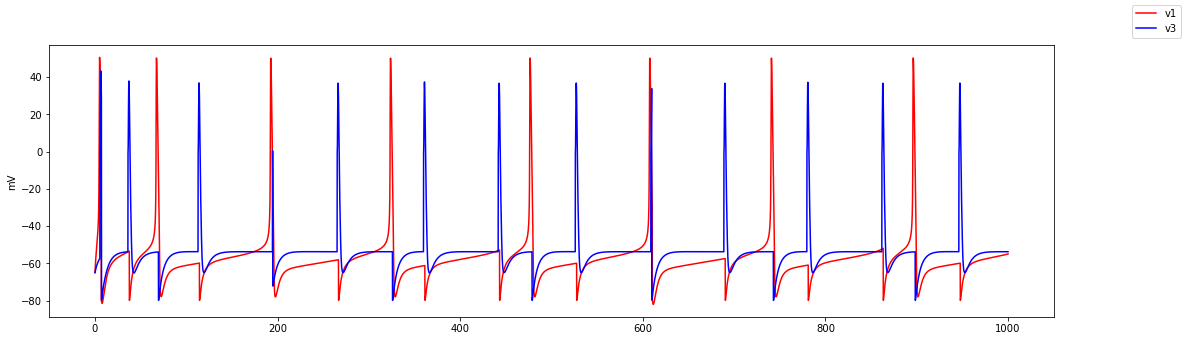

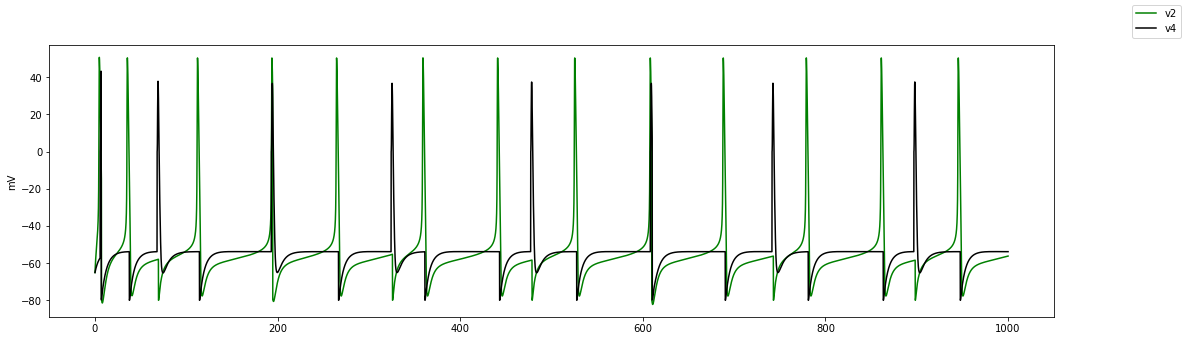

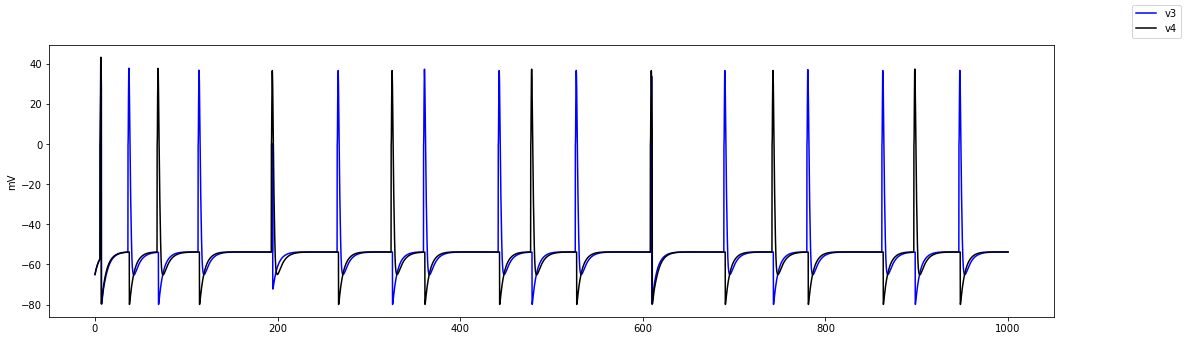

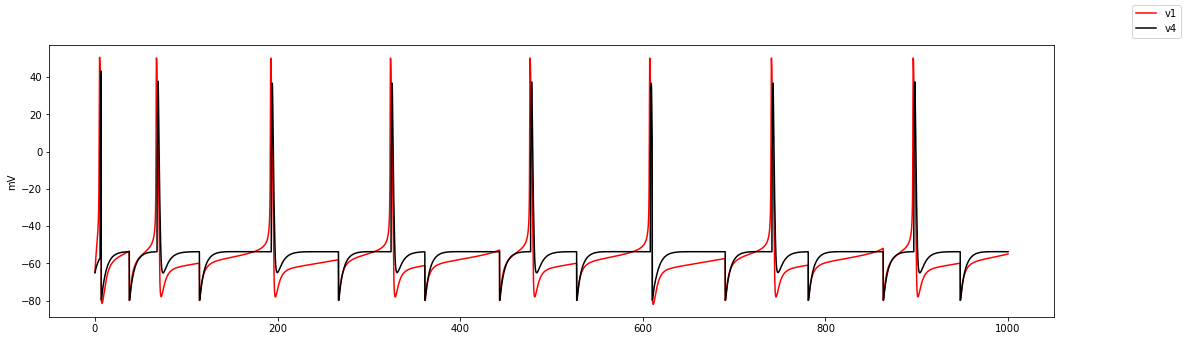

In [134]:
fig1 = plt.figure(figsize=(18,5))
fig2 = plt.figure(figsize=(18,5))
fig3 = plt.figure(figsize=(18,5))
fig4 = plt.figure(figsize=(18,5))

ax1 = fig1.add_subplot(1,1,1)

ax2= fig2.add_subplot(1,1,1)

ax3= fig3.add_subplot(1,1,1)

ax4= fig4.add_subplot(1,1,1)


p1 = ax1.plot(t,v1,color='red',label='v1')

p2 = ax2.plot(t,v2,color='green',label='v2')


p3 = ax1.plot(t,v3,color='blue',label='v3')
p4 = ax2.plot(t,v4,color='black',label='v4')

p5 = ax3.plot(t,v3,color='blue',label='v3')
p6 = ax3.plot(t,v4,color='black',label='v4')

p7 = ax4.plot(t,v1,color='red',label='v1')
p8 = ax4.plot(t,v4,color='black',label='v4')

    
ax2.set_xlabel = 'ms'
ax2.set_ylabel('mV')

ax1.set_xlabel = 'ms'
ax1.set_ylabel('mV')


ax4.set_xlabel = 'ms'
ax4.set_ylabel('mV')



ax3.set_xlabel = 'ms'
ax3.set_ylabel('mV')


fig1.legend()
fig2.legend()
fig3.legend()
fig4.legend()